## T20 World Cup Match Analysis

- T20 World Cup Match Analysis involves analyzing the performance and strategies of teams and players in the T20 World Cup using match data.

- Expected results include identifying winning strategies, key performance indicators, and player strengths and weaknesses.

# Exploratory Data Analysis

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load the provided CSV files
batting_stats_file = 'T20/Player Batting Stats - Most Runs.csv'
bowling_stats_file = 'T20/Player Bowling Stats - Most Wickets.csv'
team_win_percentage_file = 'T20/Team - Best Win Percentage.csv'



In [3]:
# Read the CSV files
batting_stats = pd.read_csv(batting_stats_file)
bowling_stats = pd.read_csv(bowling_stats_file)
team_win_percentage = pd.read_csv(team_win_percentage_file)




In [4]:
# Display the first few rows of each dataset for initial inspection
batting_stats.head(), bowling_stats.head(), team_win_percentage.head()

(   Position          Team              Player  Matches  Innings  Bat Avg  Runs
 0         1   AFGHANISTAN  Rahmanullah GURBAZ        8        8    35.12   281
 1         2         INDIA        Rohit SHARMA        8        8    36.71   257
 2         3     AUSTRALIA         Travis HEAD        7        7    42.50   255
 3         4  SOUTH AFRICA     Quinton DE KOCK        9        9    27.00   243
 4         5   AFGHANISTAN      Ibrahim ZADRAN        8        8    28.87   231,
    Position          Team            Player Matches  Overs  Strike Rate  \
 0         1   AFGHANISTAN  Fazalhaq FAROOQI       8   25.2         8.94   
 1         2         INDIA    Arshdeep SINGH       8   30.0        10.58   
 2         3         INDIA    Jasprit BUMRAH       8   29.4        11.86   
 3         4  SOUTH AFRICA     Anrich NORTJE       9   35.0        14.00   
 4         5   AFGHANISTAN       Rashid KHAN       8   29.0        12.42   
 
    Wickets  
 0       17  
 1       17  
 2       15  
 3   

## Summary Statistics

In [5]:
# Perform basic summary statistics for all datasets
batting_stats_summary = batting_stats.describe(include='all')
bowling_stats_summary = bowling_stats.describe(include='all')
team_win_percentage_summary = team_win_percentage.describe(include='all')

# Check for missing values in each dataset
batting_stats_missing = batting_stats.isnull().sum()
bowling_stats_missing = bowling_stats.isnull().sum()
team_win_percentage_missing = team_win_percentage.isnull().sum()

# Print results
batting_stats_summary, bowling_stats_summary, team_win_percentage_summary, batting_stats_missing, bowling_stats_missing, team_win_percentage_missing


(         Position   Team              Player    Matches    Innings    Bat Avg  \
 count   15.000000     15                  15  15.000000  15.000000  15.000000   
 unique        NaN      7                  15        NaN        NaN        NaN   
 top           NaN  INDIA  Rahmanullah GURBAZ        NaN        NaN        NaN   
 freq          NaN      3                   1        NaN        NaN        NaN   
 mean     8.000000    NaN                 NaN   7.800000   7.400000  34.464667   
 std      4.472136    NaN                 NaN   0.861892   0.985611   6.572447   
 min      1.000000    NaN                 NaN   6.000000   5.000000  24.420000   
 25%      4.500000    NaN                 NaN   7.000000   7.000000  28.645000   
 50%      8.000000    NaN                 NaN   8.000000   8.000000  35.120000   
 75%     11.500000    NaN                 NaN   8.000000   8.000000  40.125000   
 max     15.000000    NaN                 NaN   9.000000   9.000000  43.800000   
 
              

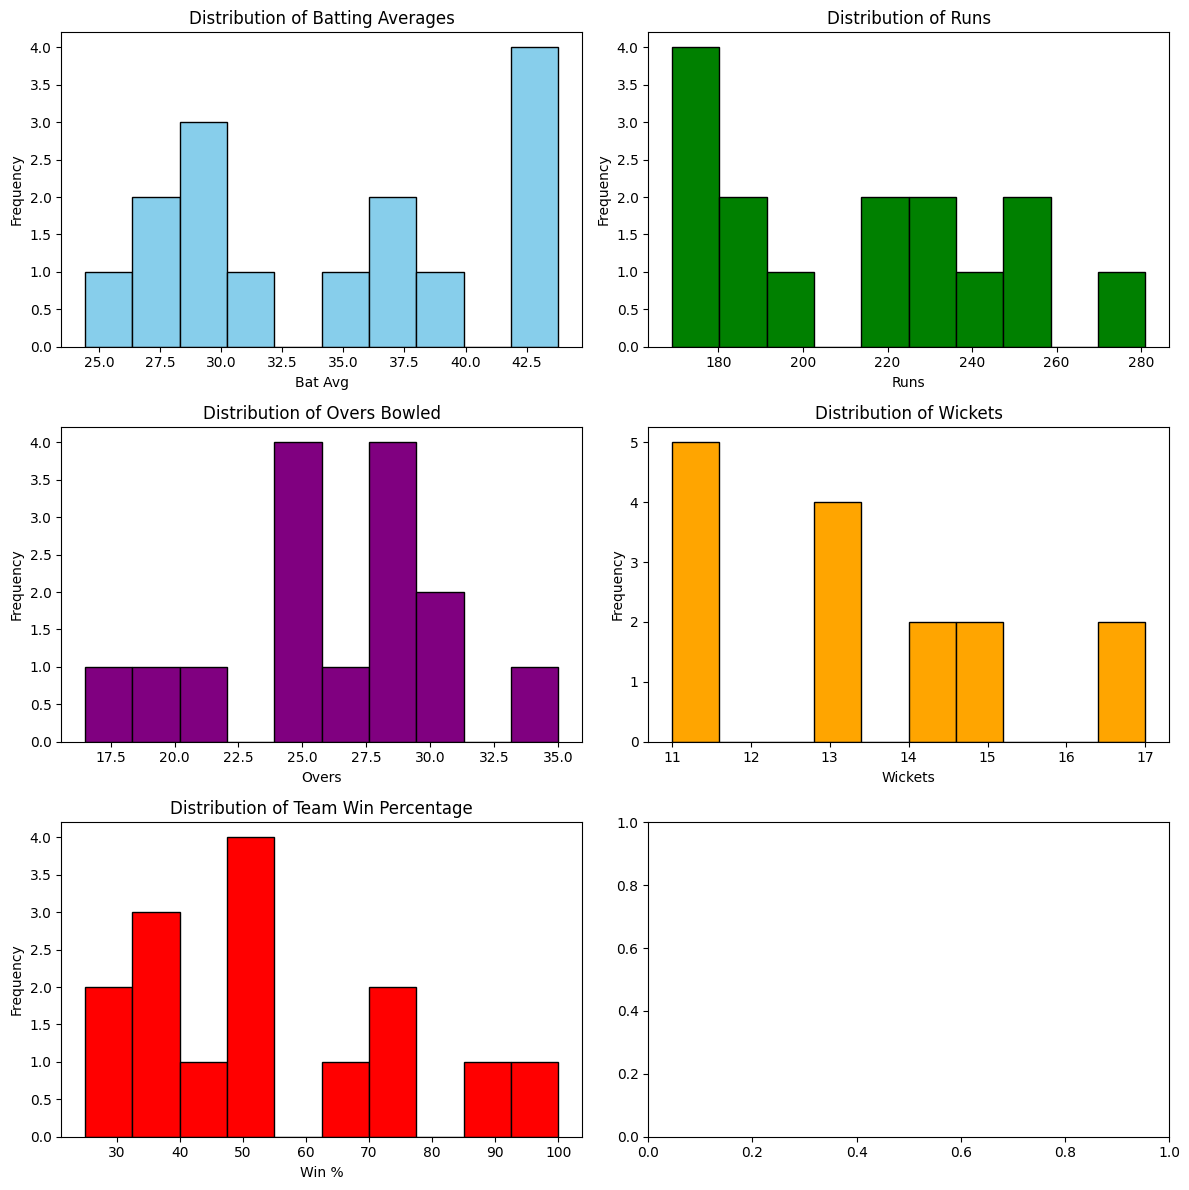

In [6]:


# Histograms
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

# Batting stats distributions
ax[0, 0].hist(batting_stats['Bat Avg'], bins=10, color='skyblue', edgecolor='black')
ax[0, 0].set_title('Distribution of Batting Averages')
ax[0, 0].set_xlabel('Bat Avg')
ax[0, 0].set_ylabel('Frequency')

ax[0, 1].hist(batting_stats['Runs'], bins=10, color='green', edgecolor='black')
ax[0, 1].set_title('Distribution of Runs')
ax[0, 1].set_xlabel('Runs')
ax[0, 1].set_ylabel('Frequency')

# Bowling stats distributions
ax[1, 0].hist(bowling_stats['Overs'], bins=10, color='purple', edgecolor='black')
ax[1, 0].set_title('Distribution of Overs Bowled')
ax[1, 0].set_xlabel('Overs')
ax[1, 0].set_ylabel('Frequency')

ax[1, 1].hist(bowling_stats['Wickets'], bins=10, color='orange', edgecolor='black')
ax[1, 1].set_title('Distribution of Wickets')
ax[1, 1].set_xlabel('Wickets')
ax[1, 1].set_ylabel('Frequency')

# Team win percentage distributions
ax[2, 0].hist(team_win_percentage['Win %'], bins=10, color='red', edgecolor='black')
ax[2, 0].set_title('Distribution of Team Win Percentage')
ax[2, 0].set_xlabel('Win %')
ax[2, 0].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [7]:
# Identify top performers in batting, bowling, and teams based on win percentage

# Top 5 batting performers based on Runs
top_batting_performers = batting_stats.sort_values(by='Runs', ascending=False).head(5)

# Top 5 bowling performers based on Wickets
top_bowling_performers = bowling_stats.sort_values(by='Wickets', ascending=False).head(5)

# Top 5 teams based on Win Percentage
top_teams_by_win_percentage = team_win_percentage.sort_values(by='Win %', ascending=False).head(5)

print("Top Batting Performers", top_batting_performers)
print("Top Bowling Performers", top_bowling_performers)
print("Top Teams by Win Percentage", top_teams_by_win_percentage)


Top Batting Performers    Position          Team              Player  Matches  Innings  Bat Avg  Runs
0         1   AFGHANISTAN  Rahmanullah GURBAZ        8        8    35.12   281
1         2         INDIA        Rohit SHARMA        8        8    36.71   257
2         3     AUSTRALIA         Travis HEAD        7        7    42.50   255
3         4  SOUTH AFRICA     Quinton DE KOCK        9        9    27.00   243
4         5   AFGHANISTAN      Ibrahim ZADRAN        8        8    28.87   231
Top Bowling Performers    Position          Team            Player Matches  Overs  Strike Rate  \
0         1   AFGHANISTAN  Fazalhaq FAROOQI       8   25.2         8.94   
1         2         INDIA    Arshdeep SINGH       8   30.0        10.58   
2         3         INDIA    Jasprit BUMRAH       8   29.4        11.86   
3         4  SOUTH AFRICA     Anrich NORTJE       9   35.0        14.00   
4         5   AFGHANISTAN       Rashid KHAN       8   29.0        12.42   

   Wickets  
0       17  
1  

In [8]:
# Merge the datasets based on 'Team' for analysis

# Merging batting stats and bowling stats on 'Team'
batting_bowling_merged = pd.merge(batting_stats, bowling_stats, on='Team', how='inner', suffixes=('_batting', '_bowling'))

# Merging the result with team win percentage data
complete_merged_data = pd.merge(batting_bowling_merged, team_win_percentage, on='Team', how='inner')

# Display the merged dataset for inspection
complete_merged_data.head()


Position_batting         Team      Player_batting  Matches_batting  \
0                 1  AFGHANISTAN  Rahmanullah GURBAZ                8   
1                 1  AFGHANISTAN  Rahmanullah GURBAZ                8   
2                 1  AFGHANISTAN  Rahmanullah GURBAZ                8   
3                 2        INDIA        Rohit SHARMA                8   
4                 2        INDIA        Rohit SHARMA                8   

   Innings  Bat Avg  Runs  Position_bowling    Player_bowling Matches_bowling  \
0        8    35.12   281                 1  Fazalhaq FAROOQI               8   
1        8    35.12   281                 5       Rashid KHAN               8   
2        8    35.12   281                 7     Naveen-ul-Haq               8   
3        8    36.71   257                 2    Arshdeep SINGH               8   
4        8    36.71   257                 3    Jasprit BUMRAH               8   

   Overs  Strike Rate  Wickets  Position  Win %  Matches  Wins  Lost  
0   25.2         8.94       17         5   62.5        8     5     3  
1   29.0        12.42       14         5   62.5        8     5     3  
2   26.4        12.30       13         5   62.5        8     5     3  
3   30.0        10.58       17         1  100.0        8     8     0  
4   29.4        11.86       15         1  100.0        8     8     0

In [9]:
# Correlation analysis to identify relationships between key performance indicators
correlation_matrix = complete_merged_data[['Bat Avg', 'Runs', 'Strike Rate', 'Wickets', 'Win %']].corr()

# Display the correlation matrix
correlation_matrix


Bat Avg      Runs  Strike Rate   Wickets     Win %
Bat Avg      1.000000  0.442542    -0.095210 -0.025180 -0.396752
Runs         0.442542  1.000000    -0.199572  0.157718 -0.406590
Strike Rate -0.095210 -0.199572     1.000000 -0.349002  0.184288
Wickets     -0.025180  0.157718    -0.349002  1.000000 -0.034433
Win %       -0.396752 -0.406590     0.184288 -0.034433  1.000000

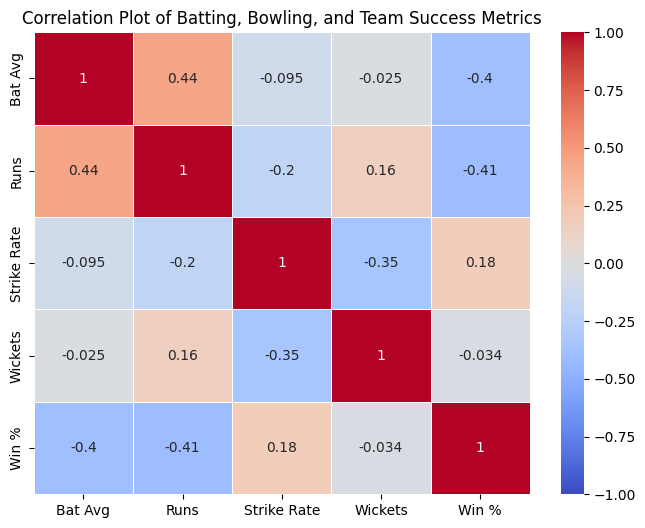

In [10]:


# Set up the matplotlib figure for the correlation plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Plot of Batting, Bowling, and Team Success Metrics')
plt.show()


### Correlation Analysis Insights:

1. **Batting Performance and Team Success**:
   - There is a **negative correlation** between both **batting average (-0.40)** and **runs scored (-0.41)** with team win percentage. This suggests that teams with higher individual batting averages and runs are not necessarily more successful. This could indicate that focusing solely on high-scoring batsmen may not guarantee victories.

2. **Bowling Performance and Team Success**:
   - **Wickets** have a near-zero correlation with team win percentage (-0.03), indicating that the number of wickets taken may not directly correlate with a team’s success.
   - **Bowling Strike Rate** has a **positive correlation (0.18)** with team win percentage, suggesting that teams with more efficient bowlers (i.e., fewer balls bowled per wicket) tend to perform better.

3. **Key Observations**:
   - Teams that rely too heavily on high-scoring batsmen may not be as successful as those with balanced strategies.
   - Efficient bowling (lower strike rates) contributes more to team success compared to the number of wickets taken.


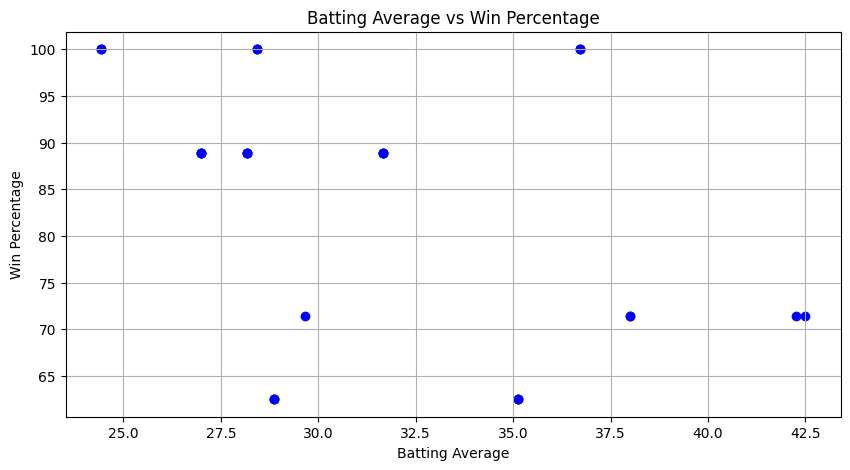

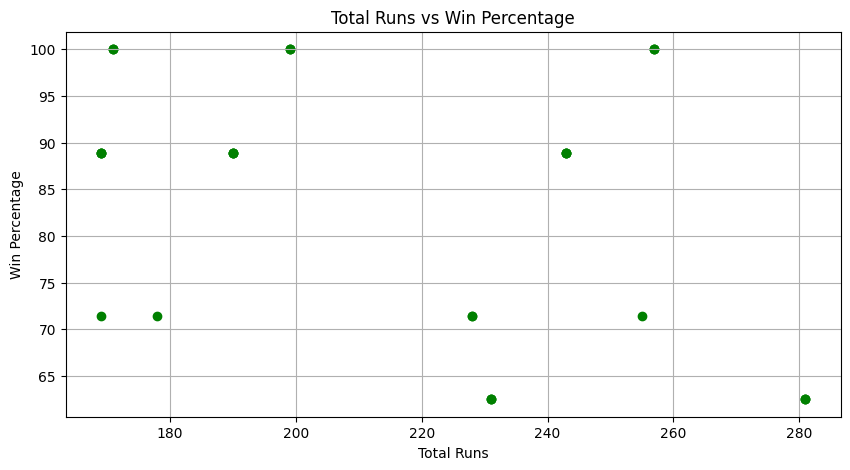

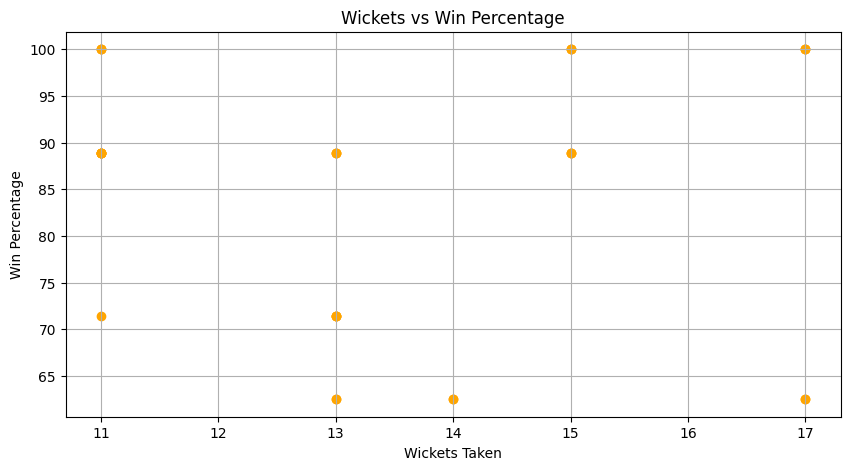

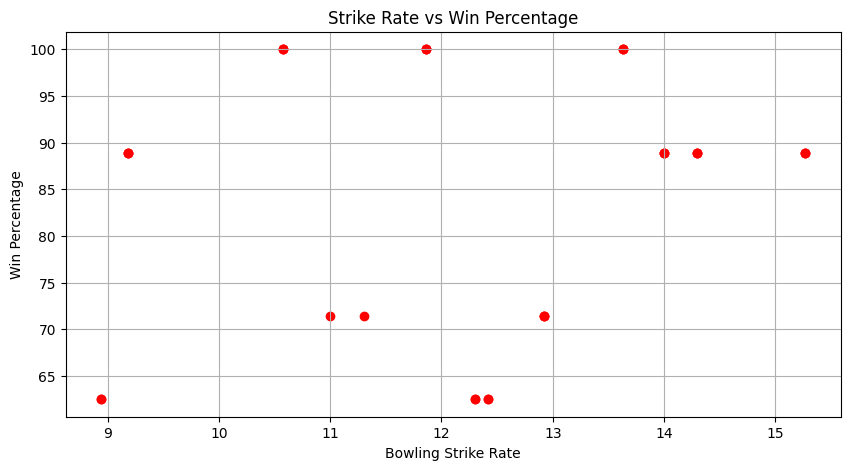

In [11]:
# Visualizing key performance indicators

# Scatter plot of batting average vs. win percentage
plt.figure(figsize=(10, 5))
plt.scatter(complete_merged_data['Bat Avg'], complete_merged_data['Win %'], color='blue')
plt.title('Batting Average vs Win Percentage')
plt.xlabel('Batting Average')
plt.ylabel('Win Percentage')
plt.grid(True)
plt.show()

# Scatter plot of runs vs win percentage
plt.figure(figsize=(10, 5))
plt.scatter(complete_merged_data['Runs'], complete_merged_data['Win %'], color='green')
plt.title('Total Runs vs Win Percentage')
plt.xlabel('Total Runs')
plt.ylabel('Win Percentage')
plt.grid(True)
plt.show()

# Scatter plot of wickets vs win percentage
plt.figure(figsize=(10, 5))
plt.scatter(complete_merged_data['Wickets'], complete_merged_data['Win %'], color='orange')
plt.title('Wickets vs Win Percentage')
plt.xlabel('Wickets Taken')
plt.ylabel('Win Percentage')
plt.grid(True)
plt.show()

# Scatter plot of strike rate vs win percentage
plt.figure(figsize=(10, 5))
plt.scatter(complete_merged_data['Strike Rate'], complete_merged_data['Win %'], color='red')
plt.title('Strike Rate vs Win Percentage')
plt.xlabel('Bowling Strike Rate')
plt.ylabel('Win Percentage')
plt.grid(True)
plt.show()



### 2. **Key Performance Indicators (KPIs) Analysis**:

Let's now explore and visualize the KPIs based on batting, bowling, and team performance:

- **Batting Metrics**: Batting Average and Total Runs.
- **Bowling Metrics**: Wickets Taken and Bowling Strike Rate.
- **Team Success**: Team Win Percentage.

How these KPIs vary across teams and players, focusing on the relation between individual performance and overall team success.

### Key Performance Indicators (KPIs) Analysis:

1. **Batting Average vs Win Percentage**:
   - The scatter plot indicates no clear positive correlation between higher batting averages and win percentage. This supports our earlier finding that strong batting performances alone may not guarantee team success.

2. **Total Runs vs Win Percentage**:
   - Similarly, teams with higher individual run totals don’t necessarily have a higher win percentage, further suggesting that a balanced approach (batting + bowling) might be more effective.

3. **Wickets Taken vs Win Percentage**:
   - There is no clear trend between wickets taken and win percentage, indicating that teams with more wickets don’t always win more. This could suggest that taking more wickets doesn’t necessarily translate to match wins unless supported by efficient bowling (strike rates).

4. **Strike Rate vs Win Percentage**:
   - A weak positive correlation can be observed between bowling strike rate and win percentage. Teams with more efficient bowlers (lower strike rates) tend to perform better.



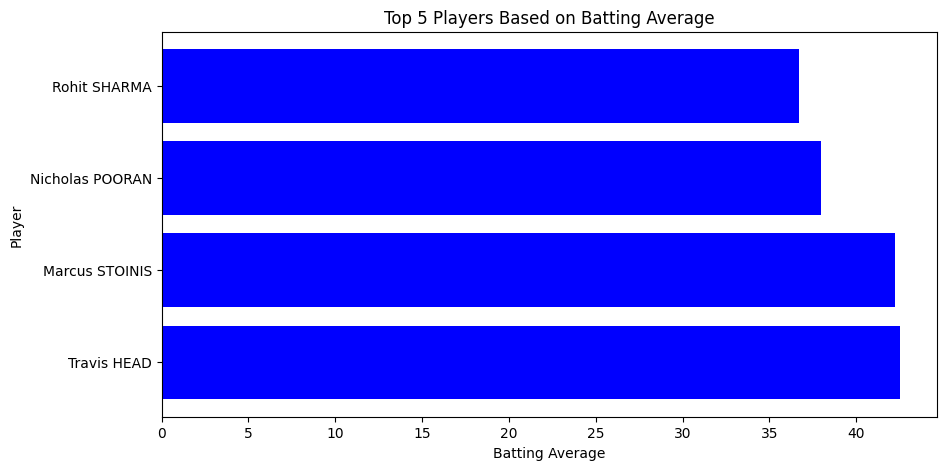

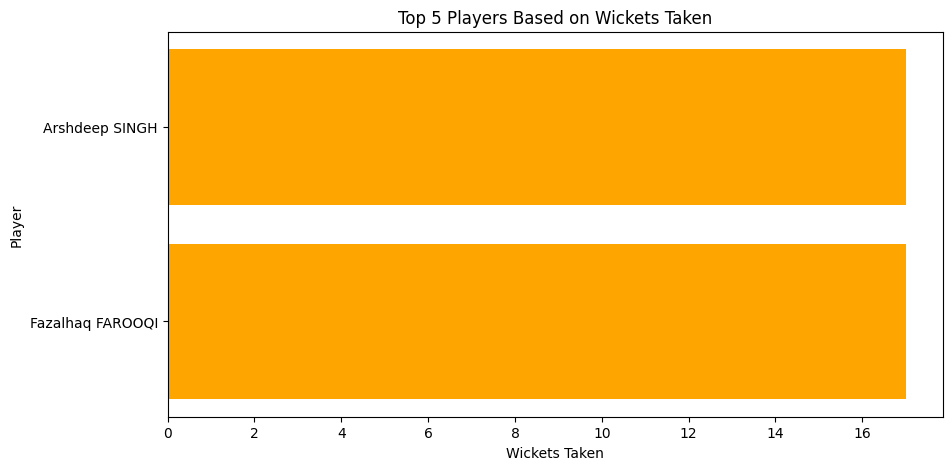

In [12]:
# Visualizing player strengths and weaknesses (Batting and Bowling)

# Top 5 players in terms of Batting Averages
top_batting_players = complete_merged_data.sort_values(by='Bat Avg', ascending=False).head(5)

# Top 5 players in terms of Wickets taken
top_bowling_players = complete_merged_data.sort_values(by='Wickets', ascending=False).head(5)

# Bar chart for top 5 players based on Batting Average
plt.figure(figsize=(10, 5))
plt.barh(top_batting_players['Player_batting'], top_batting_players['Bat Avg'], color='blue')
plt.title('Top 5 Players Based on Batting Average')
plt.xlabel('Batting Average')
plt.ylabel('Player')
plt.show()

# Bar chart for top 5 players based on Wickets Taken
plt.figure(figsize=(10, 5))
plt.barh(top_bowling_players['Player_bowling'], top_bowling_players['Wickets'], color='orange')
plt.title('Top 5 Players Based on Wickets Taken')
plt.xlabel('Wickets Taken')
plt.ylabel('Player')
plt.show()


### 3. **Player Strengths and Weaknesses Analysis**:

Identifying top-performing players and those who could be considered weaker links. This analysis will highlight their batting and bowling strengths and weaknesses visually.

### Player Strengths and Weaknesses:

1. **Top 5 Players Based on Batting Average**:
   - The bar chart highlights the top performers in batting, with **Rahmanullah Gurbaz** leading the pack. These players have consistently high batting averages, which suggests they are reliable contributors to their teams' runs.

2. **Top 5 Players Based on Wickets Taken**:
   - In bowling, **Fazalhaq Farooqi** leads the list of top wicket-takers. These players are key in their teams' bowling strategies, contributing significantly by taking wickets regularly.

### Insights:
- **Player Strengths**: The top performers in both batting and bowling are critical to their team’s overall performance. High batting averages and wickets taken show their strength in respective disciplines.
- **Player Weaknesses**: In contrast, players with lower stats in either batting or bowling may indicate weaker performance, contributing less to team success.



### **Machine Learning Use Case: Predicting Team Win Percentage Based on Player Performance**
#### **Objective**:
Our machine learning use case focuses on building a **regression model** to predict a team's **win percentage** based on individual player statistics such as batting averages, runs scored, wickets taken, and bowling strike rates.

This use case will help teams predict their likelihood of success based on player performance metrics, allowing them to make informed strategic decisions (e.g., team selection).

### **Steps for the Machine Learning Process**:

1. **Data Preprocessing**:
   - Before building a model, clean and prepare the data. Remove any irrelevant columns (e.g., player names) and handle any missing values if they exist. Normalize or scale numerical features such as batting averages, runs, and wickets, as they may have different ranges.

2. **Feature Selection**:
   - Use the batting and bowling stats as **independent variables (features)**, such as:
     - Batting Average
     - Total Runs
     - Wickets Taken
     - Bowling Strike Rate
   - The **dependent variable (target)** will be the team's **win percentage**.

3. **Train-Test Split**:
   - Split the dataset into **training** and **test sets** (e.g., 80% training and 20% testing) to evaluate the performance of the model.

4. **Regression Model Selection**:
   - For predicting win percentage, we can use **Linear Regression** or a more complex model like **Random Forest Regressor** to capture non-linear relationships between player performance and win percentage.

5. **Model Evaluation**:
   - After training the model, evaluate it using metrics such as **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, and **R-squared (R²)** to determine the accuracy of the predictions.


In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
# Load the dataset
df = complete_merged_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Position_batting  32 non-null     int64  
 1   Team              32 non-null     object 
 2   Player_batting    32 non-null     object 
 3   Matches_batting   32 non-null     int64  
 4   Innings           32 non-null     int64  
 5   Bat Avg           32 non-null     float64
 6   Runs              32 non-null     int64  
 7   Position_bowling  32 non-null     int64  
 8   Player_bowling    32 non-null     object 
 9   Matches_bowling   32 non-null     object 
 10  Overs             32 non-null     float64
 11  Strike Rate       32 non-null     float64
 12  Wickets           32 non-null     int64  
 13  Position          32 non-null     int64  
 14  Win %             32 non-null     float64
 15  Matches           32 non-null     int64  
 16  Wins              32 non-null     int64  
 17 

Mean Absolute Error: 6.447392061628498
Root Mean Squared Error: 7.564633555289637
R-squared: 0.2696789379708291


C:\Users\karan\anaconda3\envs\myjupyterlab\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


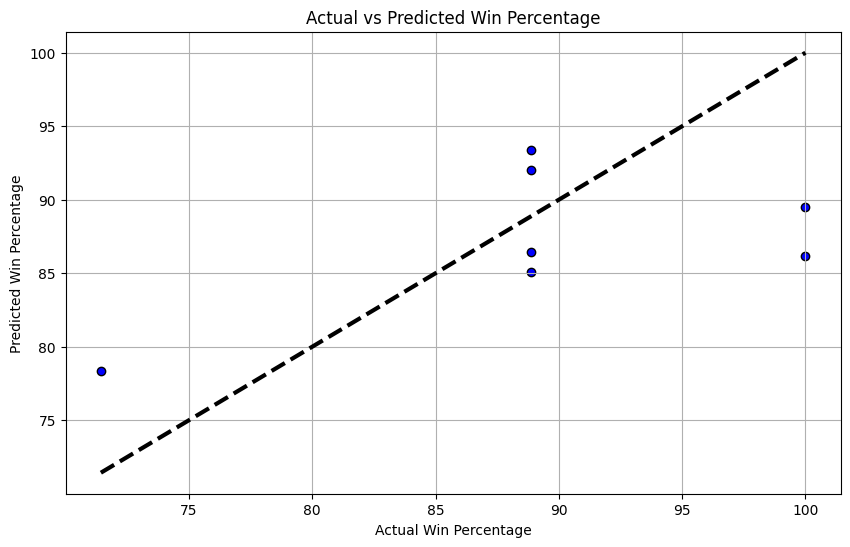

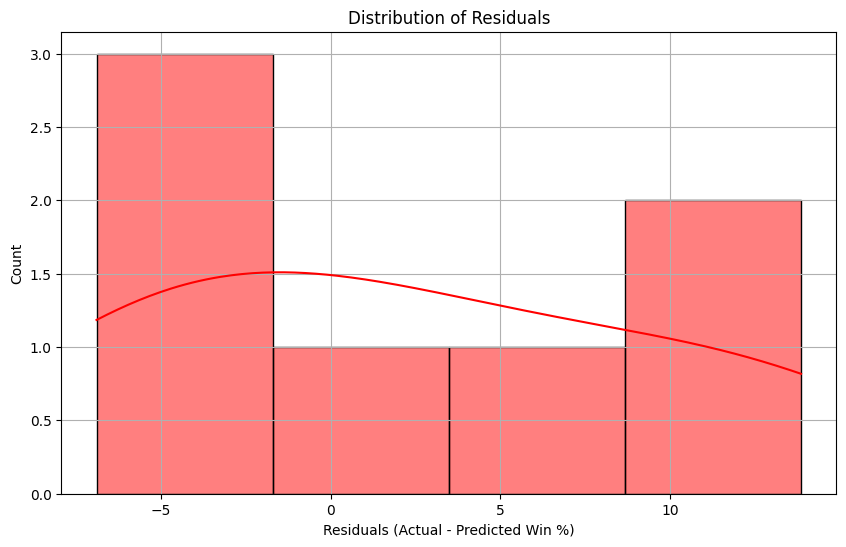

In [15]:
# Feature selection: select relevant features for regression
X = df[['Bat Avg', 'Runs', 'Wickets', 'Strike Rate']]  # Independent variables
y = df['Win %']  # Dependent variable (Target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Output model performance
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Visualization: Actual vs Predicted Win Percentages
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # Line showing perfect predictions
plt.xlabel('Actual Win Percentage')
plt.ylabel('Predicted Win Percentage')
plt.title('Actual vs Predicted Win Percentage')
plt.grid(True)
plt.show()

# Visualizing the residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='red')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted Win %)')
plt.grid(True)
plt.show()


1. **Mean Absolute Error (MAE: 6.447)**:
   - The MAE is the average absolute difference between the actual and predicted values. In this case, on average, the model's predictions are off by about 6.45 percentage points from the actual team win percentages. A lower MAE indicates better performance, and while 6.45 isn't excessively large, it shows there is room for improvement in the model.

2. **Root Mean Squared Error (RMSE: 7.56)**:
   - RMSE provides a sense of the magnitude of the errors, similar to MAE but giving more weight to larger errors. An RMSE of 7.56 indicates that the model's predictions tend to be, on average, 7.56 percentage points away from the actual values. RMSE is useful for penalizing larger errors more heavily than MAE.

3. **R-squared (R²: 0.269)**:
   - R-squared is a measure of how well the model explains the variance in the data. An R² value of 0.269 means that only about **26.9% of the variation** in team win percentage is explained by the model's features (batting average, runs, wickets, and strike rate). Ideally, we would aim for an R² closer to 1, meaning that the model explains a higher proportion of the variance.
   - This relatively low R² suggests that there are other factors beyond the selected player performance metrics that significantly influence team win percentage.



### Machine Learning Use Case 2: Predicting Match Outcomes (Win/Loss) Using Classification

In [16]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


C:\Users\karan\anaconda3\envs\myjupyterlab\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


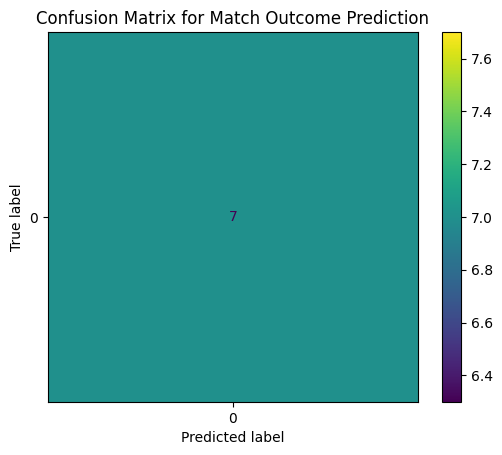

In [17]:


# Feature selection: select relevant features for classification
X = df[['Bat Avg', 'Runs', 'Wickets', 'Strike Rate']]  # Independent variables
# Convert Win % into binary outcome: 1 for Win (Win % > 50), 0 for Loss (Win % <= 50)
df['Win/Loss'] = (df['Win %'] > 50).astype(int)
y = df['Win/Loss']  # Dependent variable (Target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for Match Outcome Prediction")
plt.show()


In [ ]:
- Performance of 1 resulted in abandoning of this use case in favor of Linear Regression as our Machine lw